## Create connection to Redshift Cluster and Database

In [50]:
import psycopg2
import configparser
import matplotlib.pyplot as plt
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [7]:
config = configparser.ConfigParser()
config.read_file(open('dwh.cfg'))

DB_USER     = config.get('CLUSTER', 'DB_USER')
DB_PASSWORD = config.get('CLUSTER', 'DB_PASSWORD')
HOST        = config.get('CLUSTER', 'HOST')
DB_PORT     = config.get('CLUSTER', 'DB_PORT')
DB_NAME     = config.get('CLUSTER', 'DB_NAME')

In [71]:
# Connect to Redshift Cluster and it's database
conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
cur = conn.cursor()

## Gender Count Query

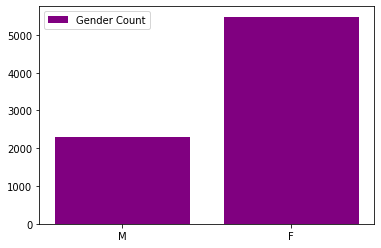

In [66]:
gender = []
ucounts = []

# Executes query getting gender count
cur.execute(" SELECT count(*), gender FROM users GROUP BY 2;")

# Appends Gender and and Count and appends to empty lists.
for n, g in cur:
    ucounts.append(n)
    gender.append(g)

# Plots the results in the Lists and creates a bar graph
plt.bar(gender, ucounts, color='purple', label='Gender Count') 
plt.legend()

    



## Top 10 artists based on songplay count

In [70]:
cur.close()

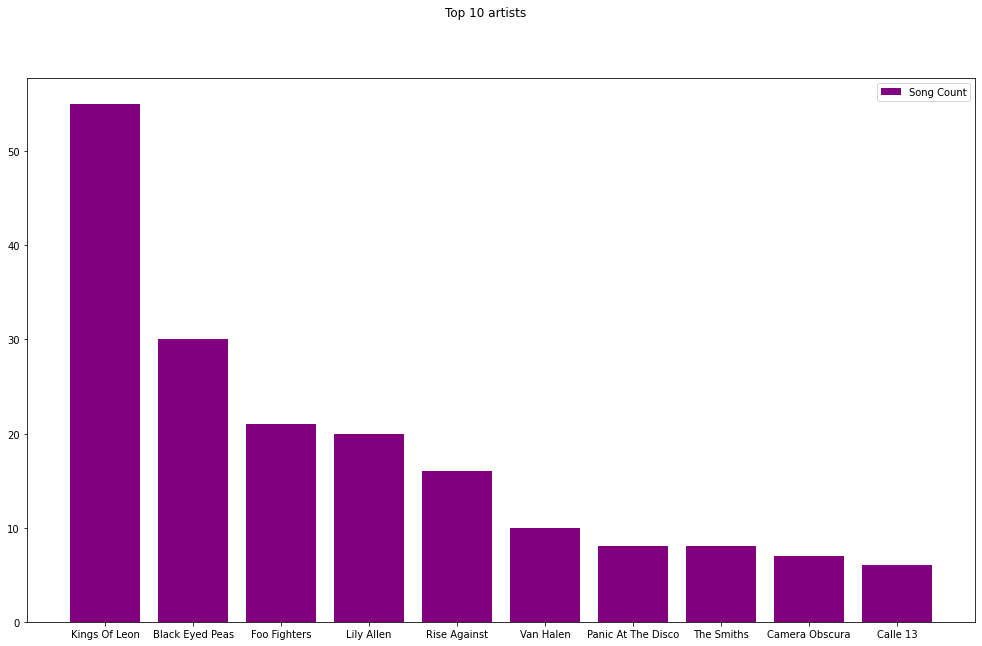

In [93]:
artist = []
song_count = []

# Executes query getting Top 10 artists with the most songplay
cur.execute("""SELECT a.artist_name, 
                COUNT (s.title) as song_cnt
                 FROM artists as a
                 JOIN songplays as sp ON a.artist_id = sp.artist_id
                 JOIN songs as s     ON sp.song_id = s.song_id
             GROUP BY a.artist_name
             ORDER BY song_cnt DESC
                LIMIT 10;
""")

# Appends Artists and and Count and appends to empty lists.
for a, num in cur:
    song_count.append(num)
    artist.append(a)

# Plots the results in the Lists and creates a bar graph
plt.figure(figsize=(17,10))
plt.bar(artist, song_count, color='purple', label='Song Count') 
plt.suptitle("Top 10 artists")
plt.legend()
